<a href="https://colab.research.google.com/github/kougayasuki/kogayasuki.githabu.io/blob/main/KaggleHousePrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import pandas as pd
train = pd.read_csv(
    "./train.csv")
test = pd.read_csv(
    "./test.csv"
)
print("train shape:", train.shape)
print("test shape:", test.shape)

train shape: (1460, 81)
test shape: (1459, 80)


In [5]:
train.info

<bound method DataFrame.info of         Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0        1          60       RL  ...        WD         Normal    208500
1        2          20       RL  ...        WD         Normal    181500
2        3          60       RL  ...        WD         Normal    223500
3        4          70       RL  ...        WD        Abnorml    140000
4        5          60       RL  ...        WD         Normal    250000
...    ...         ...      ...  ...       ...            ...       ...
1455  1456          60       RL  ...        WD         Normal    175000
1456  1457          20       RL  ...        WD         Normal    210000
1457  1458          70       RL  ...        WD         Normal    266500
1458  1459          20       RL  ...        WD         Normal    142125
1459  1460          20       RL  ...        WD         Normal    147500

[1460 rows x 81 columns]>

       price  log(price + 1)
0     208500       12.247699
1     181500       12.109016
2     223500       12.317171
3     140000       11.849405
4     250000       12.429220
...      ...             ...
1455  175000       12.072547
1456  210000       12.254868
1457  266500       12.493133
1458  142125       11.864469
1459  147500       11.901590

[1460 rows x 2 columns] 

price skew       : 1.880940746034036
log(price+1) skew: 0.12122191311528363


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb2daef5250>,
      dtype=object)

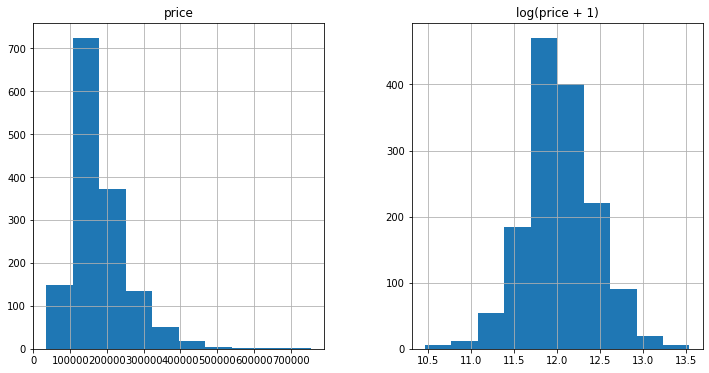

In [8]:
from ast import increment_lineno
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew
%matplotlib inline

#SalePriceについて底をeとする対数に変換し、元の値と共にデータフレームに登録
prices = pd.DataFrame({
     "price":train["SalePrice"],
     "log(price + 1)":np.log1p(train["SalePrice"])})
print(prices, "\n")
#"price"の対数変換前後の歪度を出力
print("price skew       :", skew(prices["price"]))
print("log(price+1) skew:", skew(prices["log(price + 1)"]))

#"SalePrice"の変換前と変換後をヒストグラムにする
#プロット図のサイズを設定
plt.rcParams["figure.figsize"] = (12.0, 6.0)
prices.hist()

In [10]:
train["SalePrice"] = np.log1p(train["SalePrice"])

In [12]:
all_data = pd.concat((train.loc[:, "MSSubClass":"SaleCondition"],
                     test.loc[:, "MSSubClass":"SaleCondition"]))

print(all_data.shape)
print(all_data)

(2919, 79)
      MSSubClass MSZoning  LotFrontage  ...  YrSold SaleType SaleCondition
0             60       RL         65.0  ...    2008       WD        Normal
1             20       RL         80.0  ...    2007       WD        Normal
2             60       RL         68.0  ...    2008       WD        Normal
3             70       RL         60.0  ...    2006       WD       Abnorml
4             60       RL         84.0  ...    2008       WD        Normal
...          ...      ...          ...  ...     ...      ...           ...
1454         160       RM         21.0  ...    2006       WD        Normal
1455         160       RM         21.0  ...    2006       WD       Abnorml
1456          20       RL        160.0  ...    2006       WD       Abnorml
1457          85       RL         62.0  ...    2006       WD        Normal
1458          60       RL         74.0  ...    2006       WD        Normal

[2919 rows x 79 columns]


In [17]:
from scipy.stats import skew

#object型ではないカラムのインデックスを取得
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
print("-----Column of non-object type-----")
print(numeric_feats)

#object型ではないカラムの歪度を、欠損値を除いてから求める
skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna()))
print("-----Skewness of non-object type column-----")
print(skewed_feats)

#歪度が0.75より大きいカラムのみskewed_featsをに再代入
skewed_feats = skewed_feats[skewed_feats > 0.75]
print("-----Skewness greater than 0.75-----")
print(skewed_feats)
#抽出したカラムのインデックスを取得
skewed_feats = skewed_feats.index

#歪度が0.75より大きいカラムの値を対数変換する
all_data[skewed_feats] = np.log1p(all_data[skewed_feats])
all_data[skewed_feats] #歪度が0.75より大きいより大きいカラムの対数変換を出力

-----Column of non-object type-----
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')
-----Skewness of non-object type column-----
MSSubClass        1.406210
LotFrontage       2.160866
LotArea          12.195142
OverallQual       0.216721
OverallCond       0.692355
YearBuilt        -0.612831
YearRemodAdd     -0.503044
MasVnrArea        2.666326
BsmtFinSF1        1.683771
BsmtFinSF2        4.250888
BsmtUnfSF         0.919323
TotalBsmtSF       1.522688
1stFlrSF        

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtHalfBath,KitchenAbvGr,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,4.110874,4.189655,9.042040,5.283204,6.561031,0.0,5.017280,6.753438,6.753438,6.751101,0.0,7.444833,0.000000,0.693147,0.000000,4.127134,0.000000,0.0,0.0,0.0,0.000000
1,3.044522,4.394449,9.169623,0.000000,6.886532,0.0,5.652489,7.141245,7.141245,0.000000,0.0,7.141245,0.693147,0.693147,5.700444,0.000000,0.000000,0.0,0.0,0.0,0.000000
2,4.110874,4.234107,9.328212,5.093750,6.188264,0.0,6.075346,6.825460,6.825460,6.765039,0.0,7.488294,0.000000,0.693147,0.000000,3.761200,0.000000,0.0,0.0,0.0,0.000000
3,4.262680,4.110874,9.164401,0.000000,5.379897,0.0,6.293419,6.629363,6.869014,6.629363,0.0,7.448916,0.000000,0.693147,0.000000,3.583519,5.609472,0.0,0.0,0.0,0.000000
4,4.110874,4.442651,9.565284,5.860786,6.486161,0.0,6.196444,7.044033,7.044033,6.960348,0.0,7.695758,0.000000,0.693147,5.262690,4.442651,0.000000,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,5.081404,3.091042,7.568896,0.000000,0.000000,0.0,6.304449,6.304449,6.304449,6.304449,0.0,6.996681,0.000000,0.693147,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
1455,5.081404,3.091042,7.546974,0.000000,5.533389,0.0,5.686975,6.304449,6.304449,6.304449,0.0,6.996681,0.000000,0.693147,0.000000,3.218876,0.000000,0.0,0.0,0.0,0.000000
1456,3.044522,5.081404,9.903538,0.000000,7.110696,0.0,0.000000,7.110696,7.110696,0.000000,0.0,7.110696,0.000000,0.693147,6.163315,0.000000,0.000000,0.0,0.0,0.0,0.000000
1457,4.454347,4.143135,9.253591,0.000000,5.823046,0.0,6.356108,6.816736,6.878326,0.000000,0.0,6.878326,0.693147,0.693147,4.394449,3.496508,0.000000,0.0,0.0,0.0,6.552508


In [18]:
cc_data = pd.get_dummies(train["LotShape"])
#元のLotShapeを追加
cc_data["LotShape"] = train["LotShape"]
#20レコードを出力
cc_data[:20]

,IR1,IR2,IR3,Reg,LotShape
0,0,0,0,1,Reg
1,0,0,0,1,Reg
2,1,0,0,0,IR1
3,1,0,0,0,IR1
4,1,0,0,0,IR1
5,1,0,0,0,IR1
6,0,0,0,1,Reg
7,1,0,0,0,IR1
8,0,0,0,1,Reg
9,0,0,0,1,Reg


In [19]:
all_data = pd.get_dummies(all_data)

In [21]:
#欠損値NaNをそのカラムの平均値（訓練データのみ）に置き換える
all_data = all_data.fillna(all_data[:train.shape[0]].mean())

In [23]:
#訓練データとテストデータに分ける
x_train = all_data[:train.shape[0]]
x_test = all_data[train.shape[0]:]
y = train.SalePrice

In [28]:
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
  """二乗平均平方根誤差

  Parameters:
    model(obj): Modelオブジェクト
  Returns:
    (float)訓練データの出力値と正解値とのRMSE
  """
  #クロスバリエーションによる二乗平均平方根誤差の取得
  rmse = np.sqrt(
      -cross_val_score(
          model, x_train, y,
          scoring="neg_mean_squared_error", #平均二乗誤差
          cv = 5)) #データを5分割
  return(rmse)

Ridge RMSE loss;
0.05     0.138937
0.10     0.137777
0.50     0.133467
1.00     0.131362
5.00     0.127821
10.00    0.127337
15.00    0.127529
30.00    0.128958
50.00    0.130994
75.00    0.133163
dtype: float64 

Ridge RMSE loss Mean:
0.13173438128730303


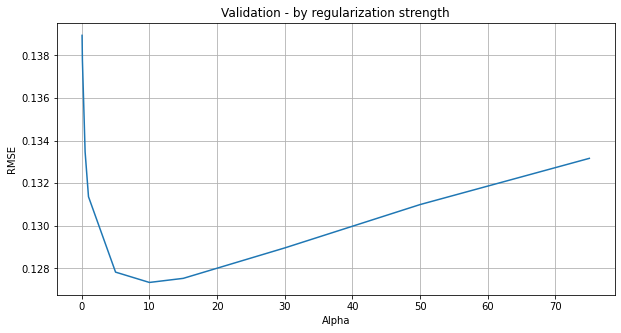

In [32]:
from  sklearn.linear_model import Ridge

#リッジ回帰モデルを生成
model_ridge = Ridge()

#L2正則化の強度を10パターン用意
alphas = [0.05, 0.1, 0.5, 1, 5, 10, 15, 30, 50, 75]
#正則化の各強度でリッジ回帰を実行
# 5分割のクロスバリデーションでRSMEを求め、その平均を取得
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean()
            for alpha in alphas]

# cv_ridgeをSeriesオブジェクトに変換
cv_ridge = pd.Series(cv_ridge, index = alphas)
#スコアを出力
print("Ridge RMSE loss;")
print(cv_ridge, "\n")
#スコアの平均を出力
print("Ridge RMSE loss Mean:")
print(cv_ridge.mean())

#正則化の強度別のスコアをグラフにする
plt.figure(figsize=(10, 5)) # 描画エリアのサイズ
plt.plot(cv_ridge)          # cv_ridgeをプロット
plt.grid()                  # グリッド表示
plt.title("Validation - by regularization strength")
plt.xlabel("Alpha")
plt.ylabel("RMSE")
plt.show()

In [33]:
from sklearn.linear_model import LassoCV

# ラッソ回帰モデルで推定する
# L1正則化項を4パターンで試す
model_lasso = LassoCV(
    alphas = [1, 0.1, 0.001, 0.0005]).fit(x_train, y)

print("Lasso regression RMSE loss:")                 #クロスバリデーションによる 
print(rmse_cv(model_lasso))                          #  RMSEを出力

print("Average losss:", rmse_cv(model_lasso).mean()) # RMSEの平均を出力
print("Minimum loss:", rmse_cv(model_lasso).min())   # RMSEの最小値を出力
print("Besr alpha  :", model_lasso.alpha_)           # 採用されたalpha値を入力

Lasso regression RMSE loss:
[0.10330995 0.13147299 0.12552458 0.10530461 0.14723333]
Average losss: 0.12256909294466997
Minimum loss: 0.10330995071896426
Besr alpha  : 0.0005


In [36]:
import xgboost as xgb

dtrain = xgb.DMatrix(x_train, label = y)

#  決定木の深さ3、学習率0.1
params = {"maxx_depth":3, "eta":0.1}
# xgboostモデルでクロスバリデーションを実行
cross_val = xgb.cv(
    params,
    dtrain,
    num_boost_round=1000,     # 決定木の本数
    early_stopping_rounds=50) # アーリーストッピングの監視回数
cross_val

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,10.380516,0.003150,10.380511,0.007227
1,9.345150,0.002915,9.345144,0.007586
2,8.413391,0.002710,8.413385,0.007925
3,7.574888,0.002511,7.575220,0.007951
4,6.820174,0.002321,6.820489,0.007688
...,...,...,...,...
234,0.012625,0.000740,0.133003,0.016376
235,0.012570,0.000735,0.133001,0.016361
236,0.012440,0.000730,0.132988,0.016388
237,0.012302,0.000810,0.132967,0.016383


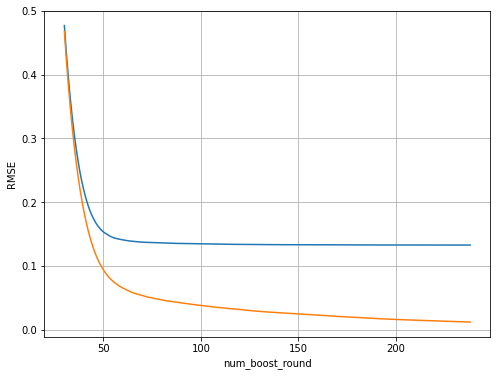

In [35]:
plt.figure(figsize=(8, 6))
plt.plot(cross_val.loc[30:,["test-rmse-mean", "train-rmse-mean"]])
plt.grid()
plt.xlabel("num_boost_round")
plt.ylabel("RMSE")
plt.show()

In [38]:
model_xgb = xgb.XGBRegressor(
    n_estimators=410,  # 決定木の本数
    max_depth=3,
    learning_rate=0.1) # 学習率
model_xgb.fit(x_train, y)

print("xgboost RMSE loss:")
print(rmse_cv(model_xgb).mean()) # クロスバリデーションによるRMSEの平均を出力

[02:12:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xgboost RMSE loss:
[02:12:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:12:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:12:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:13:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:13:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.12437590381245056


In [41]:
#ラッソ回帰と GBDTで予測
lasso_preds = np.expm1(model_lasso.predict(x_test))
xgb_preds = np.expm1(model_xgb.predict(x_test))

In [42]:
preds = lasso_preds*0.77 + xgb_preds*0.3

In [43]:
solution = pd.DataFrame({"id":test.Id, "SalePrice":preds})
solution.to_csv("ridge_sol.csv", index = False)